In [1]:
import numpy as np
import matplotlib.pyplot as plt
import thres_poiss
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
%matplotlib notebook

In [2]:
heights = np.loadtxt('heights_cw_derived_discriminated.dat')

In [3]:
pnr_height = np.histogram(heights, 200)

In [4]:
# Perform Gaussian fit and threshold determination
result = thres_poiss.gauss_fit_interp(pnr_height, min_peak_sep=0.01, weighted=True)
th = thres_poiss.thresholds_N(pnr_height, min_peak_sep=0.01, weighted=True)[0][0]
print th

0.00771864268507


In [5]:
frequencies = pnr_height[0]
x_val = pnr_height[1]
step = np.diff(x_val)[0]
x_val = x_val[:-1] + step / 2.

In [6]:
[g0, g1] = [result.eval_components(x=x_val)['g{}_'.format(k)] for k,_ in enumerate(result.components)]

In [10]:
np.savetxt('pnr_height.dat',zip(frequencies, x_val))
np.savetxt('g0_component.dat',np.array(zip(g0, x_val)))
np.savetxt('g1_component.dat',np.array(zip(g1, x_val)))

<IPython.core.display.Javascript object>


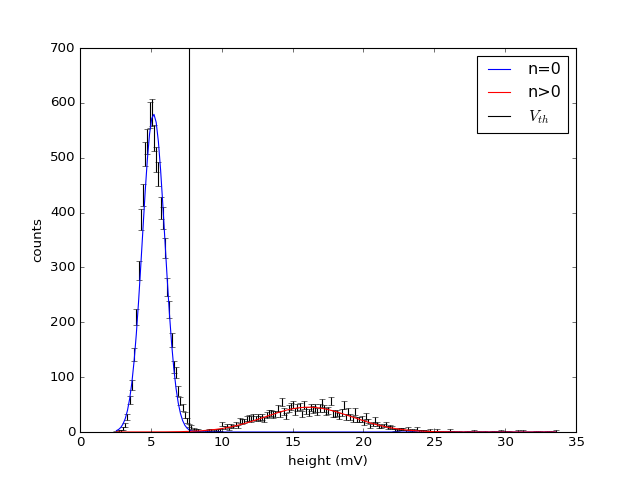

In [8]:
plt.figure(figsize=(8,6))
plt.errorbar(x_val*1e3,frequencies,yerr=np.sqrt(frequencies),linestyle='',ecolor='black')
plt.plot(x_val*1e3,g0,color='blue',label='n=0')
plt.plot(x_val*1e3,g1,color='red',label='n>0')
plt.ylabel('counts')
plt.xlabel('height (mV)')
plt.axvline(th*1e3,linestyle='-',color='black', label='$V_{th}$')
# plt.text(5,650,'n=0',ha='center')
# plt.text(16,100,'n>0',ha='center')
plt.tight_layout
plt.legend()
plt.savefig('height_histo.eps')